<a href="https://colab.research.google.com/github/jansoe/AICA/blob/main/Convolution_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Manipulation Basics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = plt.imread('drive/MyDrive/baseball.png')
img.shape

(427, 640, 4)

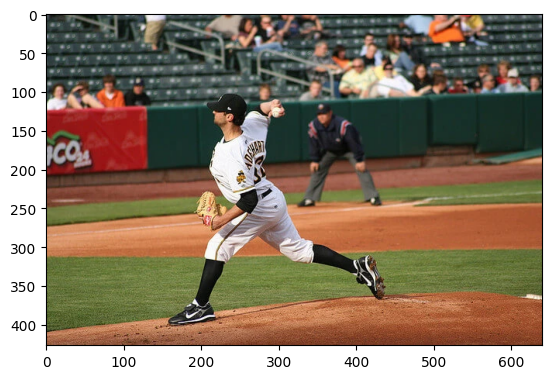

In [4]:
plt.imshow(img)

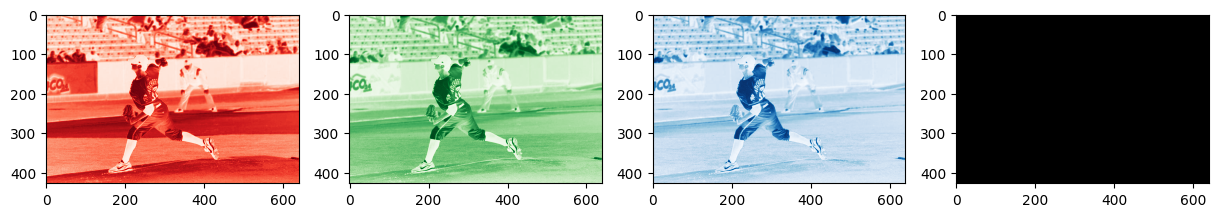

In [5]:
rgba = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.gray]

fig, ax = plt.subplots(1, 4, figsize=(15,5))
for ix in range(4):
    ax[ix].imshow(img[:,:,ix], cmap=rgba[ix])

In [6]:
# Um es einfach zu halten, arbeiten wir erstmal mit einem Graustufenbild
bw_img = img.mean(axis=2) # Mitteln über Farbkanäle erzeugt ein Graustufenbild.

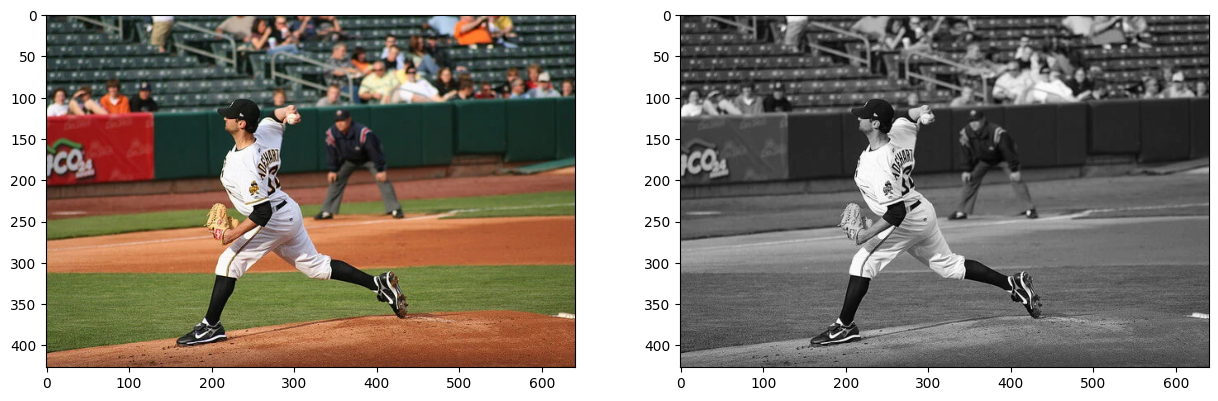

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].imshow(img)
ax[1].imshow(bw_img, cmap=plt.cm.gray)

# Faltung / Convolution

Eine wichtige Operation um Bilder zu manipulieren (auch beim maschinellen Lernen) ist die Faltung (engl. convolution). 

Der Begriff *Faltung* beschreibt also die Anwengung eines *Filters* oder sogenannten *Kernels* auf Daten - im folgenden Fall auf ein Bild. Bei der zweidimensionalen Faltung ist auch der Filter eine zweidimensionale Matrix, deren Ausmaße kleiner als die des Bildes sind. Dieser Filter wird über das Bild *geschoben*, allerdings nicht kontinuierlich sondern Bildpunkt für Bildpunkt. An jedem Punkt werden die Werte von Bild und Filter multipliziert und aufsummiert. Die so erlangten Werte ergeben dann die Bildpunkte für ein neues, gefiltertes Bild.

![Bild](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/no_padding_no_strides.gif?raw=true) Quelle: https://github.com/vdumoulin/conv_arithmetic

Die Python-Bibliothek `scipy` beinhaltet neben vielen anderen Funktionen des *Scientific Computing* auch die zweidimensionale Faltung.

Die Art des Filters enscheidet über das Ergebnis der Faltung. 

Wir definieren zunächst einen Filter, in dem überall die gleiche Zahl steht. Effektiv mittelt dieser Filter alle Pixel in seinem Bereich und erzeugt so ein verwischtes bzw. geglättetes Bild. 

In [8]:
from scipy.signal import convolve2d

In [23]:
# Die Filtergröße bestimmt wie starkt das Bild geglättet wird.
filt_size = 9
# Erzeugen der Filtermatrix.
filt = np.ones((filt_size, filt_size))
# Um die Skalierung der Ausgabe unabhängig von der Filtergröße zu machen,
# werden die Filterwerte durch ihre Summe geteilt.
filt /= filt.sum()
# Anwendung des Filters auf das Bild
filt_img = convolve2d(bw_img, filt)

In [24]:
#@title Bitte ausführen: Funktion zum Darstellen der Bilder und des Filters
def plot_convolution(image, filt, convolution):

    plt.figure(figsize = (15,15))
    plt.subplot(1,3,1)
    plt.title('Orginalbild')
    plt.imshow(image,cmap = 'gray')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('Filter')
    plt.imshow(filt,cmap= 'gray')
    plt.axis('off')
    plt.xlim(-10,15)
    plt.ylim(-10,15)

    plt.subplot(1,3,3)
    plt.title('Faltung')
    plt.imshow(convolution,cmap = 'gray')
    plt.axis('off')

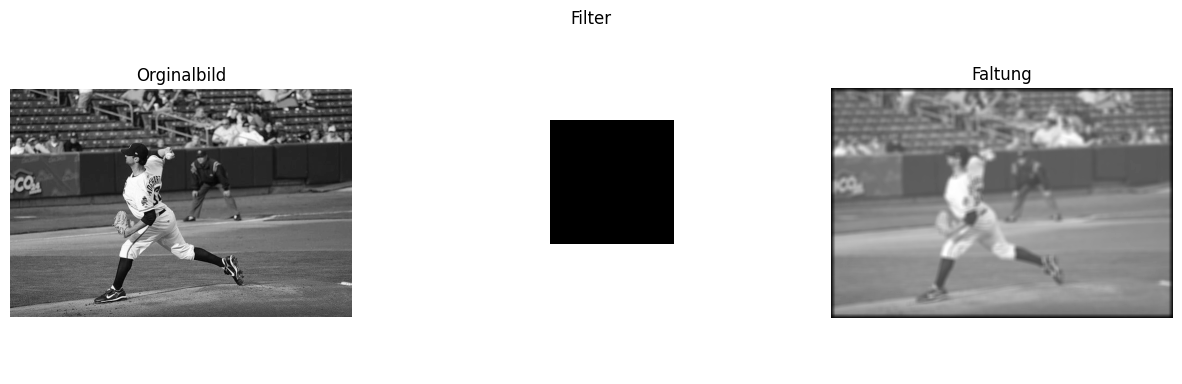

In [25]:
plot_convolution(bw_img, filt, filt_img)

Andere Filterkonfigurationen können zum Beispiel Kanten hervorheben, wie etwa der [Sobel-Operator](https://de.wikipedia.org/wiki/Sobel-Operator):

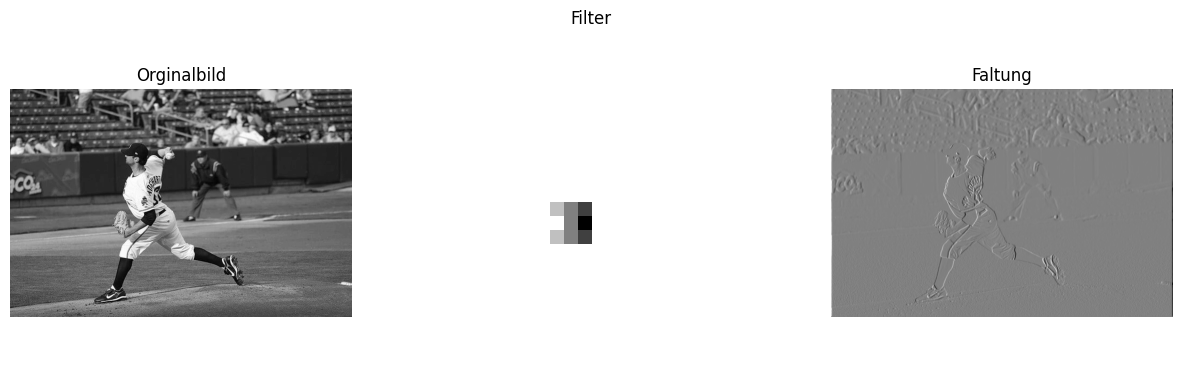

In [26]:
# Der Sobel-Operator (vertikal)
filt = np.array([[1,0,-1],
                 [2,0,-2],
                 [1,0,-1]])

# Anwendung des Filters auf das Bild
filt_img = convolve2d(bw_img,filt)
plot_convolution(bw_img, filt, filt_img)

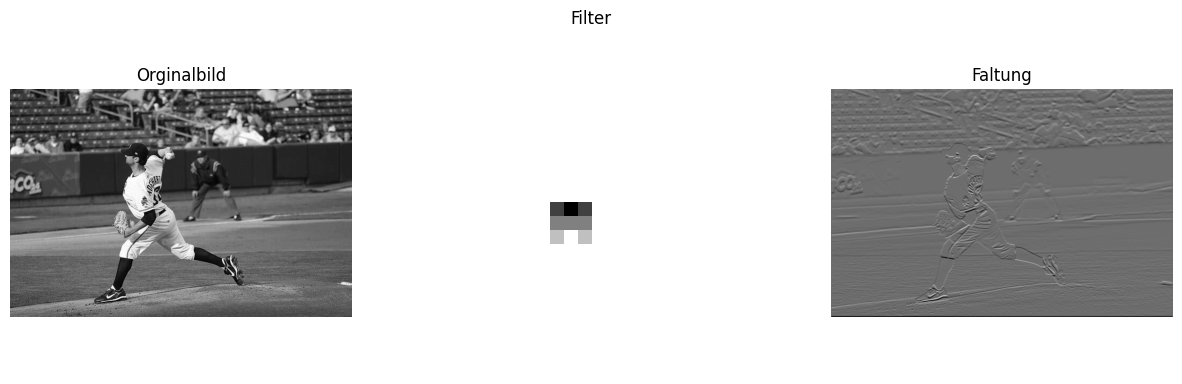

In [27]:
# Der Sobel-Operator (Horizontal)
f1 = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1,-2,-1]])

# Anwendung des Filters auf das Bild
filt_img = convolve2d(bw_img, f1)
plot_convolution(bw_img, f1, filt_img)

## Manipulation von Bildern mit PIL
Der von `plt.imread` zurückgegebene Datentyp `numpy.ndarray` ist für das Rechnen mit Matrizen und die Manipulation von großen Datenmengen ausgelegt und beinhaltet keine spezielle Funktionalität für die Bearbeitung von Bildern. Hierfür gibt es das Paket `PIL` (Python Image Library). In `PIL` ist der Datentyp `Image` implementiert, der eine Menge an bildspezifischer Funktionalität bereitstellt. Der PIL-Datentyp ist dennoch weiterhin kompatibel mit `matplotlib`.


In [28]:
from PIL import Image

img = Image.open('drive/MyDrive/baseball.png')
img = img.convert('RGB')

Transformationen wie Rotation, Größenänderung oder Cropping können einfach erreicht werden. 

Das Modul `ImageFilter` enthält verschiedene Filtern, die genauso funktionieren wie im vorherigen Abschnitt dargestellt. Mit Filtern können unterschiedliche Aspekte in Bildern hervorgehoben werden.

In [29]:
from PIL import ImageFilter
dir(ImageFilter) # filtertypen anzeigen

['BLUR',
 'BoxBlur',
 'BuiltinFilter',
 'CONTOUR',
 'Color3DLUT',
 'DETAIL',
 'EDGE_ENHANCE',
 'EDGE_ENHANCE_MORE',
 'EMBOSS',
 'FIND_EDGES',
 'Filter',
 'GaussianBlur',
 'Kernel',
 'MaxFilter',
 'MedianFilter',
 'MinFilter',
 'ModeFilter',
 'MultibandFilter',
 'RankFilter',
 'SHARPEN',
 'SMOOTH',
 'SMOOTH_MORE',
 'UnsharpMask',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'functools']

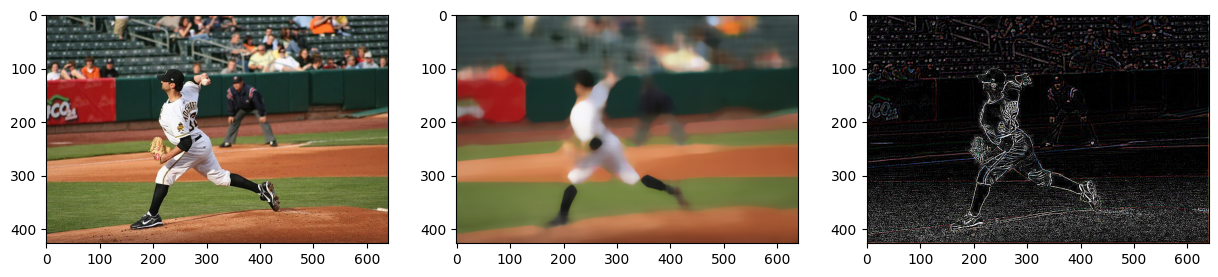

In [33]:
fig, ax = plt.subplots(1,3,figsize = (15,10))

ax[0].imshow(img)
# verwischen
ax[1].imshow(img.filter(ImageFilter.MedianFilter(27)))
# Kanten finden
ax[2].imshow(img.filter(ImageFilter.FIND_EDGES))